<a href="https://colab.research.google.com/github/Hainguyendangduc/DeepLearning_PJ/blob/main/startup_profit_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X = data.iloc[:, [0, 1, 2]].values
y = data.iloc[:, -1:].values

print(X.shape)
print(y.shape)

(50, 3)
(50, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(40, 3) (10, 3)
(40, 1) (10, 1)


In [ ]:
X_max = X_train.max(axis=0, keepdims=True)
X_min = X_train.min(axis=0, keepdims=True)
print(X_max.shape, X_min.shape)
print(X_max)
print(X_min)

(1, 3) (1, 3)
[[165349.2  182645.56 471784.1 ]]
[[    0.   51283.14     0.  ]]


In [ ]:
X_train_scaled = (X_train - X_min) / (X_max - X_min)
print(X_train_scaled.min(), X_train_scaled.max())

0.0 1.0


In [ ]:
X_test_scaled = (X_test - X_min) / (X_max - X_min)
print(X_train_scaled.min(), X_train_scaled.max())

0.0 1.0


In [ ]:
y_mean = y_train.mean(axis=0, keepdims=True)
y_std = y_train.std(axis=0, keepdims=True)

# Standardization 
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

print(y_train_scaled.max(), y_train_scaled.min())
print(y_test_scaled.max(), y_test_scaled.min())

1.8464513788878065 -2.433579441809424
0.449636647684142 -1.9276315184465596


In [ ]:
def predict(X, w):
  y_pred = np.dot(X, w.T)
  return y_pred

def loss(X, y, w):
  y_pred = predict(X, w)
  return np.mean((y_pred - y)**2)

def grad(X, y, w):
  y_pred = predict(X, w)
  delta = y_pred - y
  dw = np.dot(X.T, delta)
  return dw.T

In [ ]:
# Perform gradient descent 
def train(X, y, lr=0.01, epochs=100):
  w = np.zeros((1, X.shape[1]))
  for i in range(epochs):
    l = loss(X, y_train_scaled, w)
    dw = grad(X, y_train_scaled, w)
    w -= lr * dw
  return w

w = train(X_train_scaled, y_train_scaled)
print(w)

[[ 2.507011   -1.78316513 -0.15843011]]


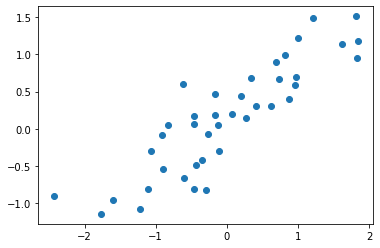

In [ ]:
y_pred = predict(X_train_scaled, w)
plt.scatter(y_train_scaled.ravel(), y_pred.ravel())

In [ ]:
def evaluation(y_true, y_pred):
  rmse = np.sqrt(np.mean((y_pred - y_true)**2))
  mae = np.mean(np.abs(y_pred - y_true))

  #r2_score = 1 - SSR / SST
  sst = np.sum((y_true - y_true.mean())**2)
  ssr = np.sum((y_true - y_pred)**2)
  r2_score = 1 - ssr / sst

  # display results
  print(f"RMSE = {rmse}")
  print(f"MAE = {mae}")
  print(f"R2_score = {r2_score}")

evaluation(y_train_scaled, y_pred)

RMSE = 0.23924693156023047
MAE = 0.1838466007600516
R2_score = 0.9427609057390144


In [ ]:
# Evaluation for testset
y_pred = predict(X_test_scaled, w)
evaluation(y_test_scaled, y_pred)

RMSE = 0.7148241097897079
MAE = 0.4690037764296552
R2_score = -0.08622870742543354


RMSE = 0.23924693156023047
MAE = 0.1838466007600516
R2_score = 0.9427609057390144


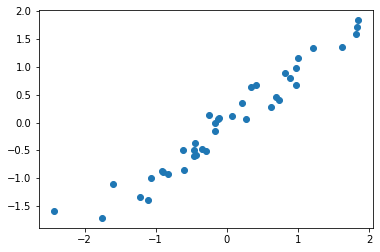

In [ ]:
# adding bias

X_train_new = np.hstack((X_train_scaled, np.ones((X_train_scaled.shape[0], 1))))
w = train(X_train_new, y_train_scaled)

y_pred = predict(X_train_new, w)
plt.scatter(y_train_scaled.ravel(), y_pred.ravel())

evaluation(y_train_scaled, y_pred)

In [ ]:
# Evaluation for testset
X_test_new = np.hstack((X_test_scaled, np.ones((X_test_scaled.shape[0], 1))))
y_pred = predict(X_test_new, w)
evaluation(y_test_scaled, y_pred)

RMSE = 0.2785271659136916
MAE = 0.2325253288892763
R2_score = 0.835085815151949


In [ ]:
y_hat = predict(X_test_scaled, w)
evaluation(y_test, y_hat)

RMSE = 101526.06876789838
MAE = 97456.43643344584
R2_score = -11.728628711332444


In [ ]:
class LinearRegression:
  def __init__(self, fit_intercept=True):
    self.fit_intercept = fit_intercept
    self.w = None

  def predict(self, X):
    if self.w is None:
      print("Model has not been fitted!!")
      return None
    else:
      if self.fit_intercept:
        X = np.hstack((X, np.ones((X.shape[0], 1))))
      return np.dot(X, self.w.T)

  def loss(self, X, y):
    y_pred = self.predict(X)
    if y_pred is None:
      print("Model has not been fitted!!")
      return None
    else:
      return 0.5 * np.mean((y_pred - y)**2)

  def fit(self, X, y, lr=0.01, epochs=100):
    if self.fit_intercept:
        self.w = np.zeros((1, X.shape[1] + 1))
        X_new = np.hstack((X, np.ones((X.shape[0], 1))))
    else:
        self.w = np.zeros((1, X.shape[1] + 1))
    
    for i in range(epochs):
      y_pred = self.predict(X)
      delta = y_pred - y
      dw = np.dot(X_new.T, delta)
      self.w -= lr * dw.T

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

y_pred = model.predict(X_train_scaled)
evaluation(y_train_scaled, y_pred)

RMSE = 0.23924693156023047
MAE = 0.1838466007600516
R2_score = 0.9427609057390144
